In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving Iris.csv to Iris (1).csv
User uploaded file "Iris (1).csv" with length 5107 bytes


In [9]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn import preprocessing

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

#from sklearn.metrics import accuracy_score, classification_report

# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)




In [4]:
# Load the dataset
df = pd.read_csv("Iris.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head(25)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()


Total Rows: 150
Total Columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [18]:
#from sklearn.preprocessing import LabelEncoder

x = df.drop(columns = ['Species'])
y = df['Species']

# Encode the target variable
#le = LabelEncoder()
#y_encoded = le.fit_transform(y)

#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

- k-Means (elbow method)<br>
- Hierarchical Clustering (dendrogram using scipy)<br>
- Bonus: Use PCA or t-SNE before clustering


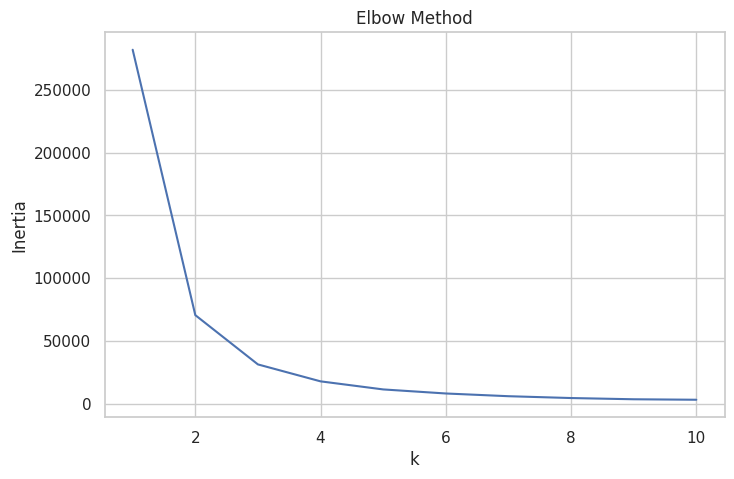

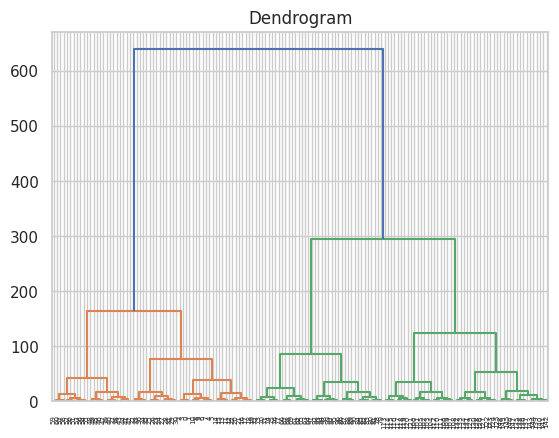

In [17]:

# k-Means (elbow method)
inertia = []
for k in range(1, 11):
    inertia.append(KMeans(n_clusters=k).fit(x).inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia)
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Hierarchical Clustering
linked = linkage(x, 'ward')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()